### AdaBoost (Adaptive Boosting) Classifier

> Putting the weight where weak learners need it most

**_AdaBoost_** starts with a single, simple tree and identifies the instances it misclassifies. It then builds new trees to fix those errors, learning from its mistakes and getting better with each step.

AdaBoost is an ensemble machine learning model that creates a sequence of weighted decision trees, typically using shallow trees (often just single-level "stumps"). Each tree is trained on the entire dataset, but with adaptive sample weights that give more importance to previously misclassified examples.

For classification tasks, AdaBoost combines the trees through a weighted voting system, where better-performing trees get more influence in the final decision.

The model's strength comes from its adaptive learning process — while each simple tree might be a “weak learner” that performs only slightly better than random guessing, the weighted combination of trees creates a “strong learner” that progressively focuses on and corrects mistakes.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
# Create and prepare dataset
dataset_dict = {
    'Outlook': ['sunny', 'sunny', 'overcast', 'rainy', 'rainy', 'rainy', 'overcast', 
                'sunny', 'sunny', 'rainy', 'sunny', 'overcast', 'overcast', 'rainy',
                'sunny', 'overcast', 'rainy', 'sunny', 'sunny', 'rainy', 'overcast',
                'rainy', 'sunny', 'overcast', 'sunny', 'overcast', 'rainy', 'overcast'],
    'Temperature': [85.0, 80.0, 83.0, 70.0, 68.0, 65.0, 64.0, 72.0, 69.0, 75.0, 75.0,
                   72.0, 81.0, 71.0, 81.0, 74.0, 76.0, 78.0, 82.0, 67.0, 85.0, 73.0,
                   88.0, 77.0, 79.0, 80.0, 66.0, 84.0],
    'Humidity': [85.0, 90.0, 78.0, 96.0, 80.0, 70.0, 65.0, 95.0, 70.0, 80.0, 70.0,
                 90.0, 75.0, 80.0, 88.0, 92.0, 85.0, 75.0, 92.0, 90.0, 85.0, 88.0,
                 65.0, 70.0, 60.0, 95.0, 70.0, 78.0],
    'Wind': [False, True, False, False, False, True, True, False, False, False, True,
             True, False, True, True, False, False, True, False, True, True, False,
             True, False, False, True, False, False],
    'Play': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes',
             'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes',
             'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes']
}
# Prepare data
df = pd.DataFrame(dataset_dict)
df = pd.get_dummies(df, columns=['Outlook'], prefix='', prefix_sep='', dtype=int)
df['Wind'] = df['Wind'].astype(int)
df['Play'] = (df['Play'] == 'Yes').astype(int)

# Rearrange columns
column_order = ['sunny', 'overcast', 'rainy', 'Temperature', 'Humidity', 'Wind', 'Play']
df = df[column_order]

# Prepare features and target
X,y = df.drop('Play', axis=1), df['Play']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, shuffle=False)

#### Main Mechanism

> Here's how AdaBoost works:

1. **_Initialize Weights_**: Assign equal weight to each training example.

2. **_Iterative Learning_**: In each step, a simple decision tree is trained and its performance is checked. Misclassified examples get more weight, making them a priority for the next tree. Correctly classified examples stay the same, and all weights are adjusted to add up to 1.

3. **_Build Weak Learners_**: Each new, simple tree targets the mistakes of the previous ones, creating a sequence of specialized weak learners.

4. **_Final Prediction_**: Combine all trees through weighted voting, where each tree’s vote is based on its importance value, giving more influence to more accurate trees.

Following the SAMME (Stagewise Additive Modeling using a Multi-class Exponential loss function) algorithm, the standard approach in `scikit-learn` that handles both binary and multi-class classification.

**1.1.** Decide the weak learner to be used. A one-level decision tree (or “stump”) is the default choice.

**1.2.** Decide how many weak learner (in this case the number of trees) you want to build (the default is 50 trees).

**1.3.** Start by giving each training example equal weight:
  
  · Each sample gets weight = 1/N (N is total number of samples)
  
  · All weights together sum to 1

D:\WORKSPACE\GitHub\shortthirdman\PredictorXVault-Cookbook\dev\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


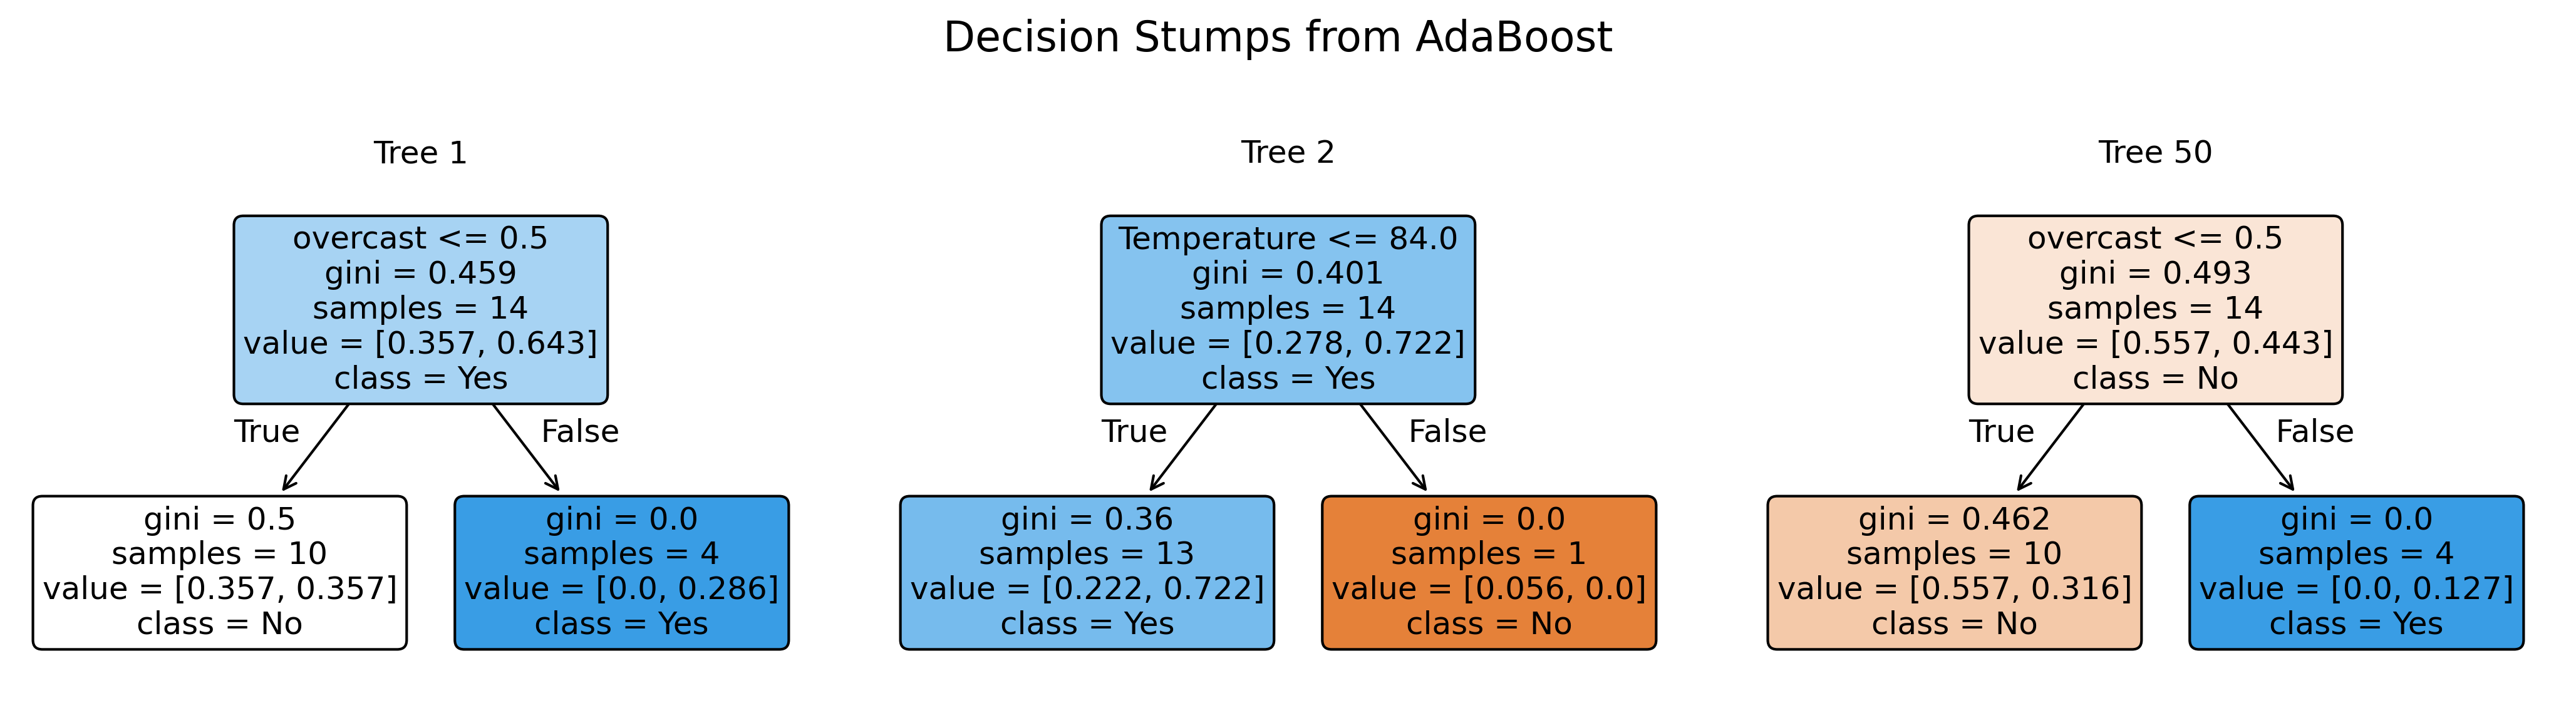

In [2]:
from sklearn.tree import plot_tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Train AdaBoost
np.random.seed(42)  # For reproducibility
clf = AdaBoostClassifier(algorithm='SAMME', n_estimators=50, random_state=42)
clf.fit(X_train, y_train)

# Create visualizations for trees 1, 2, and 50
trees_to_show = [0, 1, 49]
feature_names = X_train.columns.tolist()
class_names = ['No', 'Yes']

# Set up the plot
fig, axes = plt.subplots(1, 3, figsize=(14,4), dpi=300)
fig.suptitle('Decision Stumps from AdaBoost', fontsize=16)

# Plot each tree
for idx, tree_idx in enumerate(trees_to_show):
    plot_tree(clf.estimators_[tree_idx],
              feature_names=feature_names,
              class_names=class_names,
              filled=True,
              rounded=True,
              ax=axes[idx],
              fontsize=12)  # Increased font size
    axes[idx].set_title(f'Tree {tree_idx + 1}', fontsize=12)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

In [3]:
# Get predictions
y_pred = clf.predict(X_test)

# Create DataFrame with actual and predicted values
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})
print(results_df) # Display results DataFrame

# Calculate and display accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.4f}")

    Actual  Predicted
14       0          0
15       1          1
16       1          1
17       0          0
18       0          0
19       0          1
20       1          1
21       1          0
22       1          0
23       1          1
24       1          0
25       1          1
26       0          0
27       1          1

Model Accuracy: 0.7143
